<a href="https://colab.research.google.com/github/claireshin17/codestates_projects/blob/main/Section3_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
!pip install category_encoders
!pip install eli5 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from google.colab import files
warnings.filterwarnings("ignore")

In [178]:
con = sqlite3.connect("flights.db")
flights = pd.read_sql("SELECT * FROM flights", con)
flights.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [179]:
flights = flights.drop('Route', axis=1)

In [180]:
flights.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302


In [181]:
flights.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


<Figure size 1800x1200 with 0 Axes>

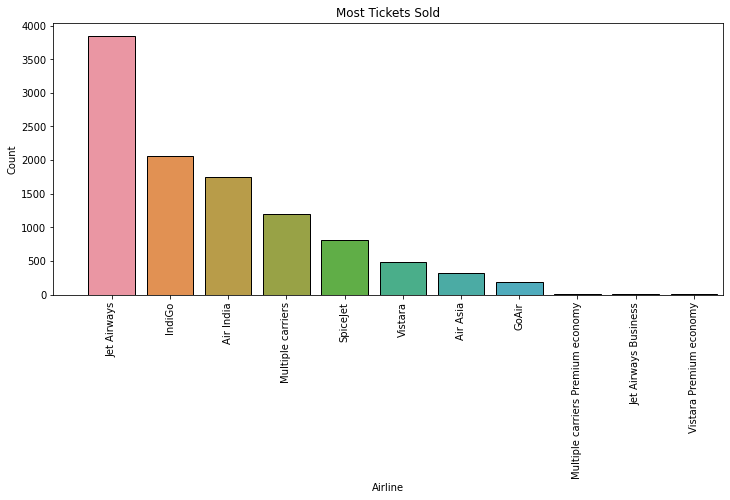

In [182]:
plt.figure(dpi=300)
plt.figure(figsize=(12,5))
sns.countplot(x="Airline", data=flights, order = flights['Airline'].value_counts().index, ec = "black")
font_style={'size':20,'color':'black'}
plt.title("Most Tickets Sold")
plt.ylabel("Count")
plt.xlabel("Airline")
plt.xticks(rotation= 90)
plt.xlim(-1,10.5)
plt.show()

In [183]:
airlines = flights.groupby('Airline').Price.mean()
air_df = airlines.to_frame().sort_values('Price',ascending=False)
air_df

,Price
Airline,
Jet Airways Business,58358.666667
Jet Airways,11643.923357
Multiple carriers Premium economy,11418.846154
Multiple carriers,10902.678094
Air India,9611.210616
Vistara Premium economy,8962.333333
Vistara,7796.348643
GoAir,5861.056701
IndiGo,5673.682903


<Figure size 1800x1200 with 0 Axes>

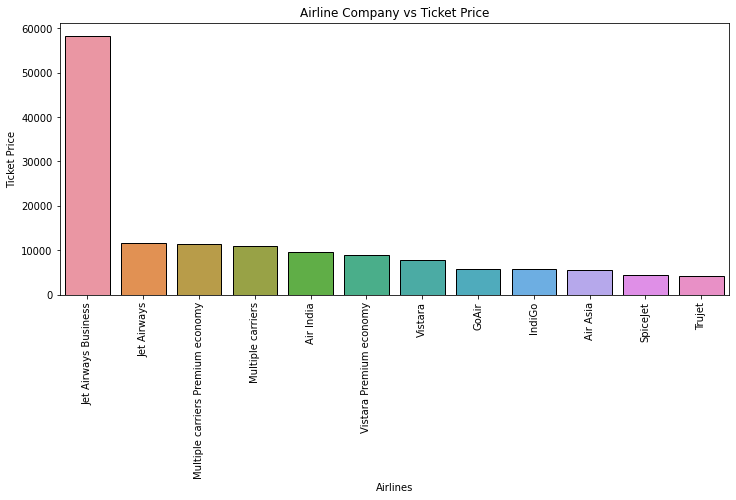

In [184]:
plt.figure(dpi=300)
plt.subplots(figsize=(12,5))
sns.barplot(x=air_df.index, y=air_df["Price"], ec = "black")
font_style={'size':20,'color':'black'}
plt.title("Airline Company vs Ticket Price")
plt.ylabel("Ticket Price")
plt.xlabel("Airlines")
plt.xticks(rotation=90)
plt.show()

In [185]:
days = flights[['Airline', 'Date_of_Journey', 'Price']].copy()
days.head()

,Airline,Date_of_Journey,Price
0,IndiGo,24/03/2019,3897
1,Air India,1/05/2019,7662
2,Jet Airways,9/06/2019,13882
3,IndiGo,12/05/2019,6218
4,IndiGo,01/03/2019,13302


In [186]:
days['Date_of_Journey'] = pd.to_datetime(days['Date_of_Journey'], format='%d/%m/%Y')
days['Weekday'] = days['Date_of_Journey'].dt.day_name()
days['Weekend'] = days['Weekday'].apply(lambda day: 1 if day == 'Saturday' or day == 'Sunday' else 0)
days.head()

,Airline,Date_of_Journey,Price,Weekday,Weekend
0,IndiGo,2019-03-24,3897,Sunday,1
1,Air India,2019-05-01,7662,Wednesday,0
2,Jet Airways,2019-06-09,13882,Sunday,1
3,IndiGo,2019-05-12,6218,Sunday,1
4,IndiGo,2019-03-01,13302,Friday,0


<Figure size 1800x1200 with 0 Axes>

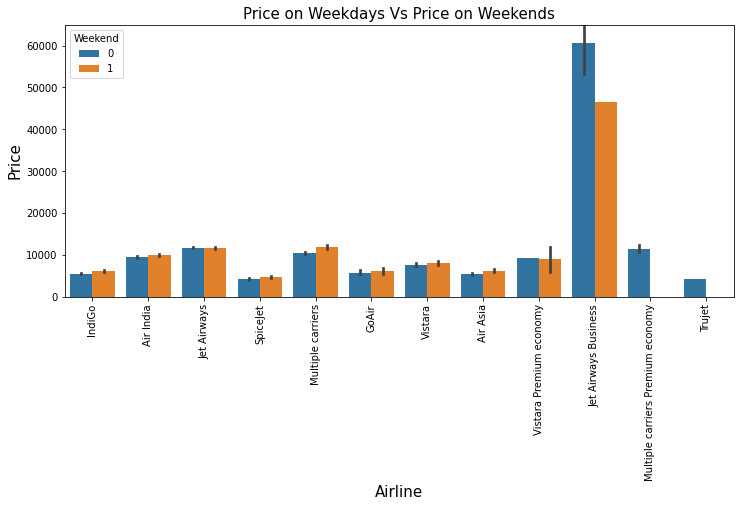

In [187]:
plt.figure(dpi=300)
plt.subplots(figsize=(12,5))
sns.barplot(data=days, x='Airline', y='Price', hue='Weekend')
plt.xlabel("Airline", size = 15)
plt.xticks(rotation = 90)
plt.ylabel("Price", size = 15)
plt.title("Price on Weekdays Vs Price on Weekends", size = 15)
plt.legend(title='Weekend'.title())
plt.ylim(0,65000)
plt.show()

In [188]:
flights["Journey_date"] = flights["Date_of_Journey"].str.split("/").str[0].astype(int)
flights["Journey_month"]= flights["Date_of_Journey"].str.split("/").str[1].astype(int)
flights["Journey_year"] = flights["Date_of_Journey"].str.split("/").str[2].astype(int)

In [189]:
flights = flights.drop(['Date_of_Journey'], axis=1)

In [190]:
flights["Total_Stops"] = flights["Total_Stops"].str.split(" ").str[0]
flights["Total_Stops"] = flights["Total_Stops"].replace("non-stop","0")
flights.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1,No info,13302,1,3,2019


In [191]:
flights = flights.drop(['Dep_Time','Arrival_Time'], axis=1)

In [192]:
flights.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,2019


In [193]:
flights["Duration_hr"] = flights["Duration"].str.split('h').str[0]

In [194]:
flights[flights['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Duration_hr
6474,Air India,Mumbai,Hyderabad,5m,2,No info,17327,6,3,2019,5m


In [195]:
flights = flights.drop(6474)

convert to minutes

In [196]:
flights["Duration_min"] = flights["Duration"].str.split(' ').str[1].str.split('m').str[0]
flights['Duration_min'].fillna("0", inplace=True)
flights["Duration"]=(flights["Duration_hr"].astype(int)*60) + flights["Duration_min"].astype(int)
flights = flights.drop(['Duration_hr','Duration_min'],axis=1)
flights.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,1,3,2019


In [197]:
flights.isnull().sum()

Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Journey_date       0
Journey_month      0
Journey_year       0
dtype: int64

In [198]:
flights["Total_Stops"] = flights["Total_Stops"].fillna('1')
flights["Total_Stops"] = flights["Total_Stops"].astype(int)

In [199]:
flights.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,1,3,2019


In [200]:
flights['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [201]:
flights['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

In [202]:
flights['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [203]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in ["Airline","Source","Destination"]:
    flights[i]=le.fit_transform(flights[i])

flights.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,3,0,5,170,0,No info,3897,24,3,2019
1,1,3,0,445,2,No info,7662,1,5,2019
2,4,2,1,1140,2,No info,13882,9,6,2019
3,3,3,0,325,1,No info,6218,12,5,2019
4,3,0,5,285,1,No info,13302,1,3,2019


In [204]:
flights['Airline'].value_counts()

4     3849
3     2053
1     1751
6     1196
8      818
10     479
0      319
2      194
7       13
5        6
11       3
9        1
Name: Airline, dtype: int64

In [205]:
flights['Source'].value_counts()

2    4537
3    2871
0    2197
4     696
1     381
Name: Source, dtype: int64

In [206]:
flights['Destination'].value_counts()

1    4537
0    2871
2    1265
5     932
3     696
4     381
Name: Destination, dtype: int64

<Figure size 1800x1200 with 0 Axes>

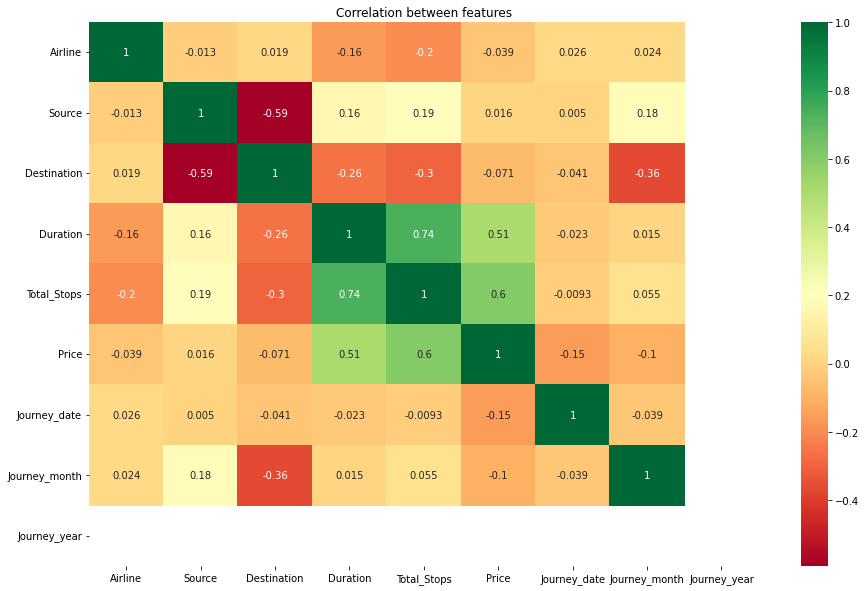

In [207]:
plt.figure(dpi=300)
plt.figure(figsize=(15,10))
sns.heatmap(flights.corr(), annot=True, cmap='RdYlGn')
plt.title("Correlation between features")
plt.show()

In [208]:
flights = flights.drop(['Additional_Info'], axis=1)

In [209]:
flights.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Journey_year
0,3,0,5,170,0,3897,24,3,2019
1,1,3,0,445,2,7662,1,5,2019
2,4,2,1,1140,2,13882,9,6,2019
3,3,3,0,325,1,6218,12,5,2019
4,3,0,5,285,1,13302,1,3,2019


In [210]:
flights.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Journey_year
0,3,0,5,170,0,3897,24,3,2019
1,1,3,0,445,2,7662,1,5,2019
2,4,2,1,1140,2,13882,9,6,2019
3,3,3,0,325,1,6218,12,5,2019
4,3,0,5,285,1,13302,1,3,2019


In [211]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [212]:
target = 'Price'
X_train, X_test, y_train, y_test = train_test_split(flights.drop(columns='Price'), flights[target],
                                                    train_size=0.8, test_size=0.2, random_state=2)

In [213]:
X_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Journey_year
9958,6,2,1,470,1,1,6,2019
7570,10,1,4,140,0,3,5,2019
713,4,3,0,1235,1,24,3,2019
885,1,0,2,170,0,15,5,2019
6329,4,3,0,960,1,6,6,2019


In [214]:
X_test.head()

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Journey_year
8839,4,0,2,175,0,21,6,2019
6183,4,0,5,375,1,6,3,2019
4095,4,4,3,85,0,21,3,2019
230,1,3,0,1540,1,24,3,2019
5712,4,2,1,505,2,1,6,2019


In [215]:
y_train.head()

9958     8937
7570    11982
713     10031
885      5228
6329    10844
Name: Price, dtype: int64

In [216]:
y_test.head()

8839     5769
6183    19225
4095     8040
230     14641
5712    15318
Name: Price, dtype: int64

In [217]:
def predict(algorithm):
    model = algorithm.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("The Predicted Price values are:",y_pred)
    print('\n')
    r2 = r2_score(y_test, y_pred)
    print("r2 score: ", r2)
    print('MAE: ', (mean_absolute_error(y_test,y_pred)))
    print('MSE: ', (mean_squared_error(y_test,y_pred)))
    
    return(r2)

In [218]:
dt = predict(DecisionTreeRegressor())

The Predicted Price values are: [ 8016. 19225.  4160. ...  6121. 13227. 15292.]


r2 score:  0.6042958525448182
MAE:  1623.2072598435727
MSE:  8798903.08909516


In [219]:
rf = predict(RandomForestRegressor())

The Predicted Price values are: [ 7976.80125    19648.405       4521.75133333 ...  6049.87216667
 12281.23       14280.06      ]


r2 score:  0.7565761653996609
MAE:  1402.8269156586864
MSE:  5412788.175203307


In [220]:
from sklearn.model_selection import RandomizedSearchCV

In [221]:
random_search = {'n_estimators' : [100, 120, 150, 180, 200, 220, 250],
                 'max_features': ['auto', 'sqrt'],
                 'max_depth': [5, 10, 15, 20, 30],
                 'min_samples_split': [2, 5, 10, 15, 100],
                 'min_samples_leaf': [1, 2, 5, 10]}

rf_reg = RandomForestRegressor()
rf = RandomizedSearchCV(estimator=rf_reg, param_distributions = random_search,
                            cv=3, n_jobs=-1, verbose=2, random_state=0)
rf.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250]},
                   random_state=0, verbose=2)

In [222]:
rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [223]:
pred = rf.predict(X_test)
r2_score(y_test, pred)

0.7813679450811419

In [224]:
print('r2_score:',r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2_score: 0.7813679450811419
MAE: 1324.1122999341142
MSE: 4861516.554154002
RMSE: 2204.8847031430014


In [225]:
import pickle

In [226]:
file = open('flight_model.pkl','wb')
pickle.dump(rf, file)

In [227]:
model = open('flight_model.pkl','rb')
forest = pickle.load(model)

In [228]:
result = forest.predict(X_test)
print("The predicted prices are", result)
print("r2 score = ", r2_score(y_test, result))

The predicted prices are [ 7882.83531187 20052.47021122  4518.5734246  ...  5903.65805367
 12247.51449593 14026.15163462]
r2 score =  0.7813679450811419
